In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
budget_data = pd.read_csv("Budget.csv")
personal_transaction_data = pd.read_csv("personal_transactions.csv")

In [3]:
budget_data

,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25
5,Fast Food,15
6,Gas & Fuel,75
7,Groceries,150
8,Haircut,30
9,Home Improvement,250


In [4]:
personal_transaction_data.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [5]:
final_PF_data = personal_transaction_data.drop('Date', axis=1)[:12]
final_PF_data

,Description,Amount,Transaction Type,Category,Account Name
0,Amazon,11.11,debit,Shopping,Platinum Card
1,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,Netflix,11.76,debit,Movies & DVDs,Platinum Card
5,American Tavern,25.85,debit,Restaurants,Silver Card
6,Hardware Store,18.45,debit,Home Improvement,Silver Card
7,Gas Company,45.00,debit,Utilities,Checking
8,Hardware Store,15.38,debit,Home Improvement,Silver Card
9,Spotify,10.69,debit,Music,Platinum Card


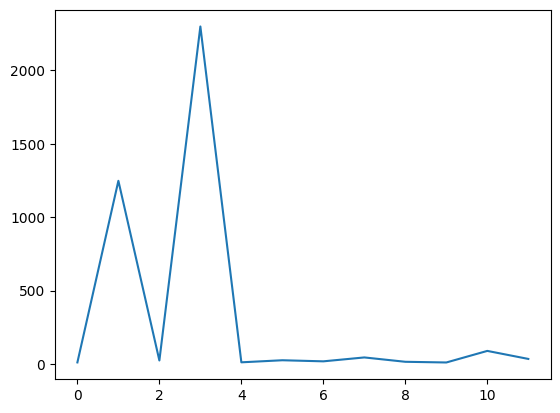

In [24]:
plt.plot(final_PF_data['Amount'])

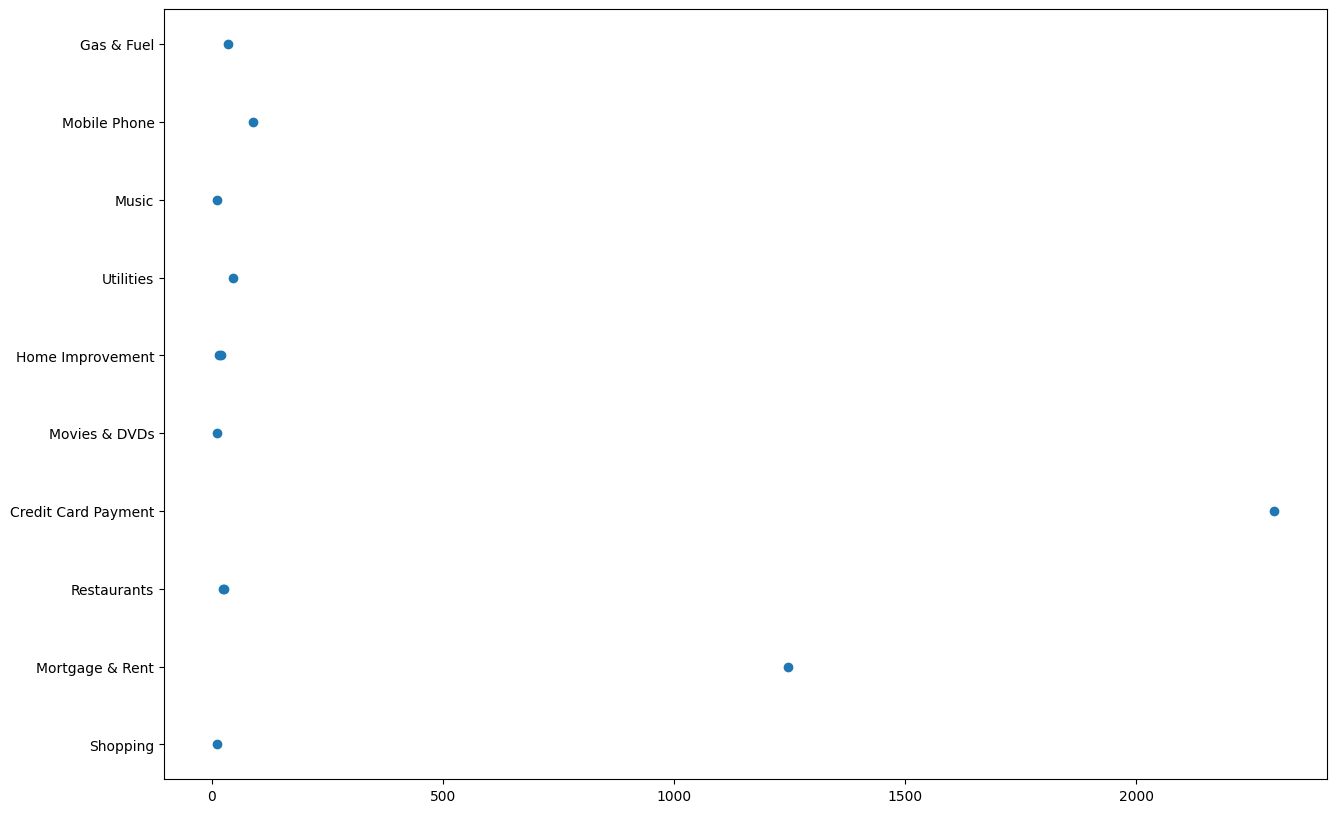

In [34]:
plt.figure(figsize=(15,10), dpi=100)
plt.scatter(final_PF_data['Amount'], final_PF_data['Category'])

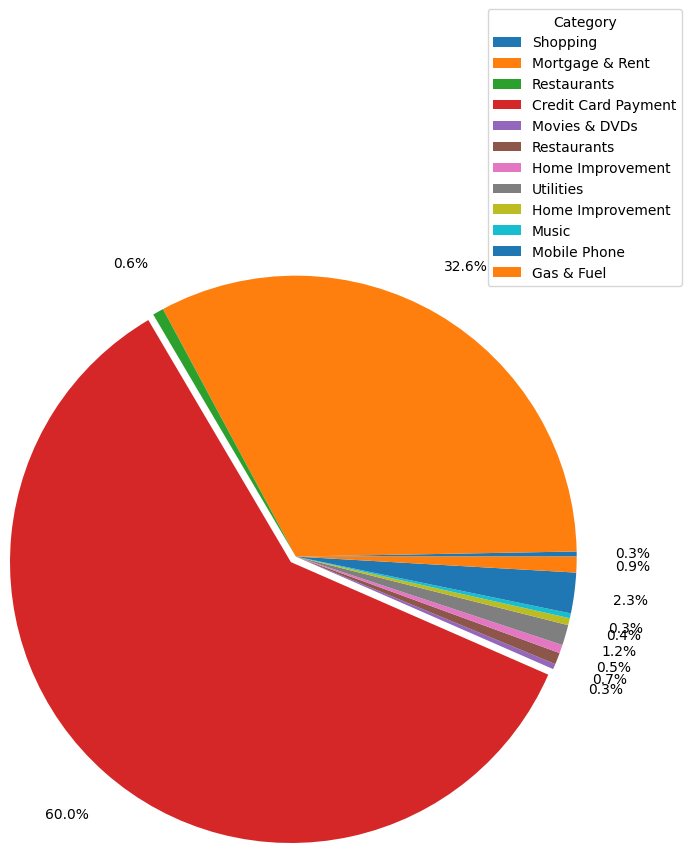

In [38]:
explode = (0,0,0,0.05,0,0,0,0,0,0,0,0)
plt.pie(final_PF_data['Amount'], explode=explode, autopct='%1.1f%%', radius=1.9, pctdistance=1.2, labeldistance=1.2)
plt.legend(final_PF_data['Category'], title="Category", bbox_to_anchor=(1,2))
plt.show()

In [7]:
data_for_counting_sum = final_PF_data.loc[:, ['Amount', 'Account Name']]

In [8]:
data_for_counting_sum

,Amount,Account Name
0,11.11,Platinum Card
1,1247.44,Checking
2,24.22,Silver Card
3,2298.09,Platinum Card
4,11.76,Platinum Card
5,25.85,Silver Card
6,18.45,Silver Card
7,45.00,Checking
8,15.38,Silver Card
9,10.69,Platinum Card


In [9]:
def getTotalAmountPaidBySpecificAccounts():
    sum_dict = {"Platinum Card": 0, "Checking": 0, "Silver Card": 0}
    for index, row in data_for_counting_sum.iterrows():
        if row['Account Name'] == "Platinum Card":
            sum_dict['Platinum Card'] = sum_dict['Platinum Card'] + row['Amount']
        elif row['Account Name'] == "Checking":
            sum_dict['Checking'] = sum_dict['Checking'] + row['Amount']
        elif row['Account Name'] == "Silver Card":
            sum_dict['Silver Card'] = sum_dict['Silver Card'] + row['Amount']
    return [sum_dict['Platinum Card'], sum_dict['Checking'], sum_dict['Silver Card']]

sum_data = getTotalAmountPaidBySpecificAccounts()
sum_data

[2366.5200000000004, 1381.9, 83.89999999999999]

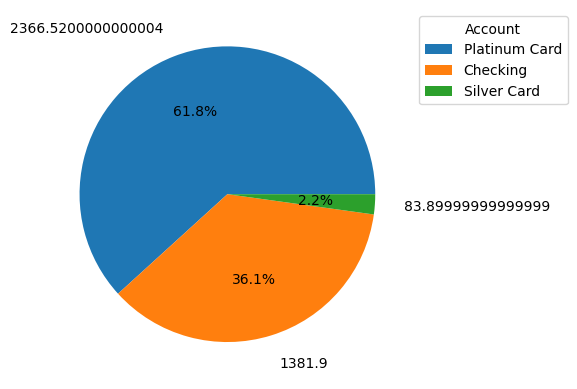

In [10]:
plt.pie(sum_data, labels=sum_data, autopct='%1.1f%%', labeldistance=1.2)
plt.legend(data_for_counting_sum['Account Name'], title="Account", bbox_to_anchor=(1,1))
plt.show()

In [21]:
print("Total Amount spend this month:", sum(sum_data))

Total Amount spend this month: 3832.3200000000006
